In [6]:
## Q1: Problem Definition
'''
The U.S. labor market is witnessing a rise in demand for skilled foreign workers. In FY 2016 alone, over 775,000 visa applications were processed — a 9% increase from the previous year.

Manual review of applications is time-consuming, inconsistent, and inefficient.

To address this, the Office of Foreign Labor Certification (OFLC) has partnered with EasyVisa to build a machine learning model that will:
• Predict whether a visa application is likely to be certified or denied.
• Identify the key drivers influencing visa decisions.
• Support decision-makers by automating and streamlining the visa review process.
'''

'\nThe U.S. labor market is witnessing a rise in demand for skilled foreign workers. In FY 2016 alone, over 775,000 visa applications were processed — a 9% increase from the previous year.\n\nManual review of applications is time-consuming, inconsistent, and inefficient.\n\nTo address this, the Office of Foreign Labor Certification (OFLC) has partnered with EasyVisa to build a machine learning model that will:\n• Predict whether a visa application is likely to be certified or denied.\n• Identify the key drivers influencing visa decisions.\n• Support decision-makers by automating and streamlining the visa review process.\n'

In [7]:
# Q2: Univariate Analysis – Categorical Variables

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
from google.colab import files
uploaded = files.upload()


Saving EasyVisa (1).csv to EasyVisa (1) (1).csv


In [9]:
df = pd.read_csv('EasyVisa (1).csv')

In [10]:
# Set visual style
sns.set(style='whitegrid')

In [11]:
# List of categorical columns
cat_cols = ['continent', 'education_of_employee', 'has_job_experience',
            'requires_job_training', 'region_of_employment', 'unit_of_wage',
            'full_time_position', 'case_status']

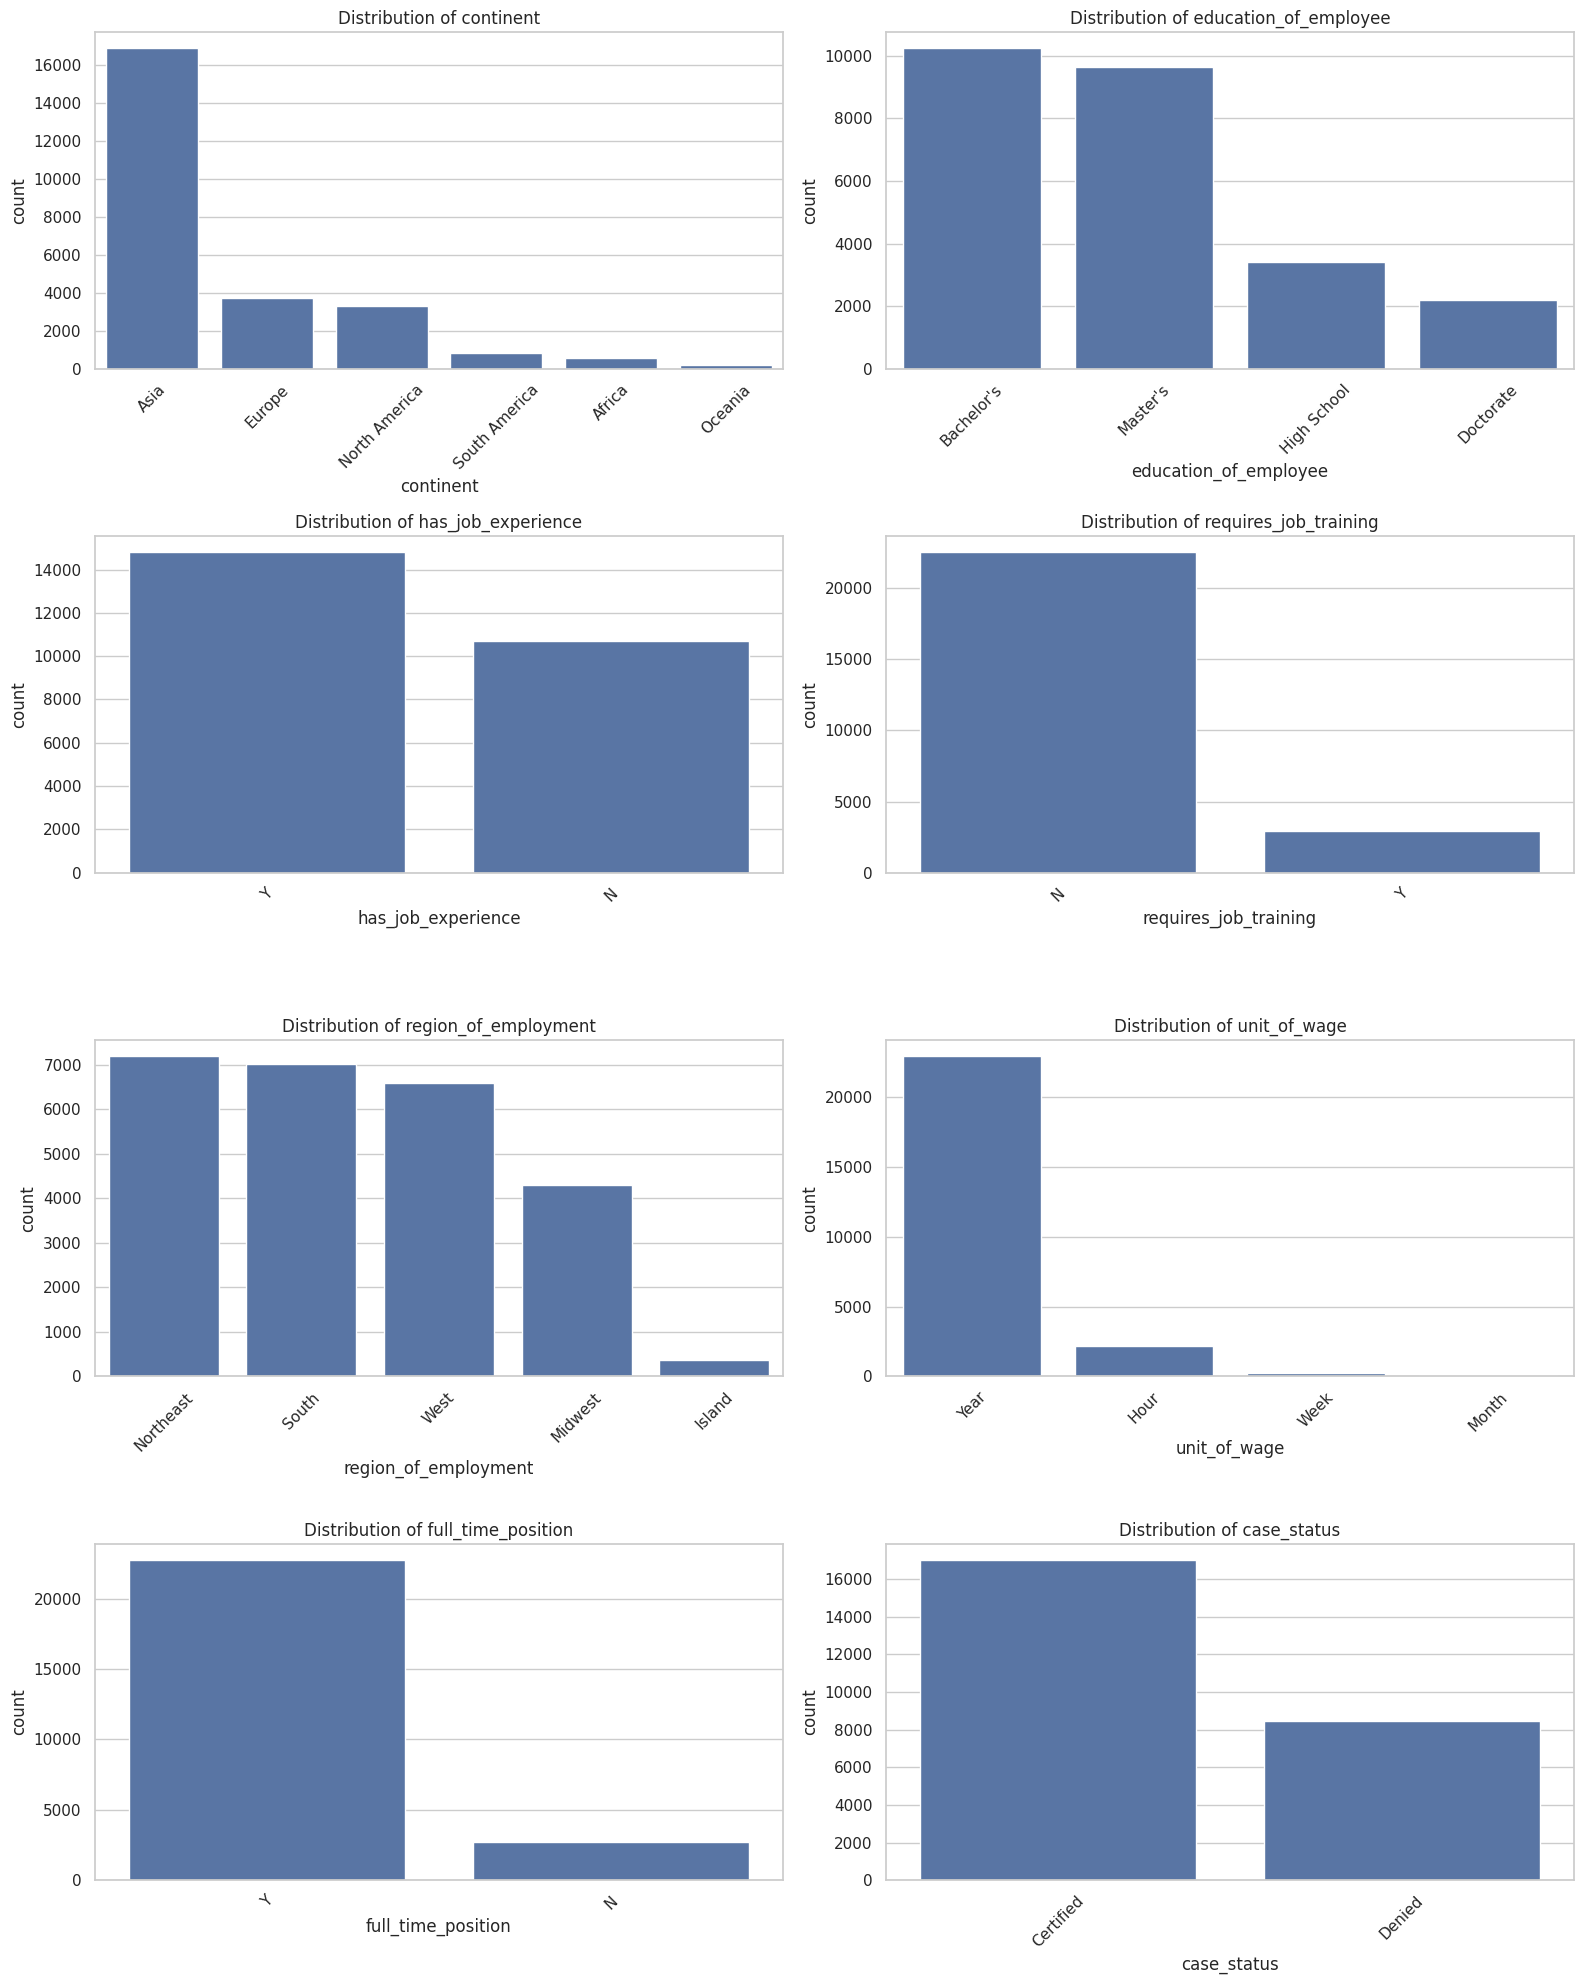

In [12]:
# Plot categorical distributions
fig, axs = plt.subplots(4, 2, figsize=(16, 20))
axs = axs.flatten()

for i, col in enumerate(cat_cols):
    sns.countplot(data=df, x=col, ax=axs[i], order=df[col].value_counts().index)
    axs[i].set_title(f'Distribution of {col}')
    axs[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Asia leads applications – Most visa applicants are from Asia, showing regional dominance.

Highly educated applicants – Bachelor’s and Master’s degrees make up the majority.

Full-time, experienced candidates – Most roles are full-time, and applicants often have job experience.

Yearly wages dominate – Majority of jobs offer annual salaries, not hourly or weekly.

Certification rate is high, but denials exist – Most applications are approved, though rejections are notable.

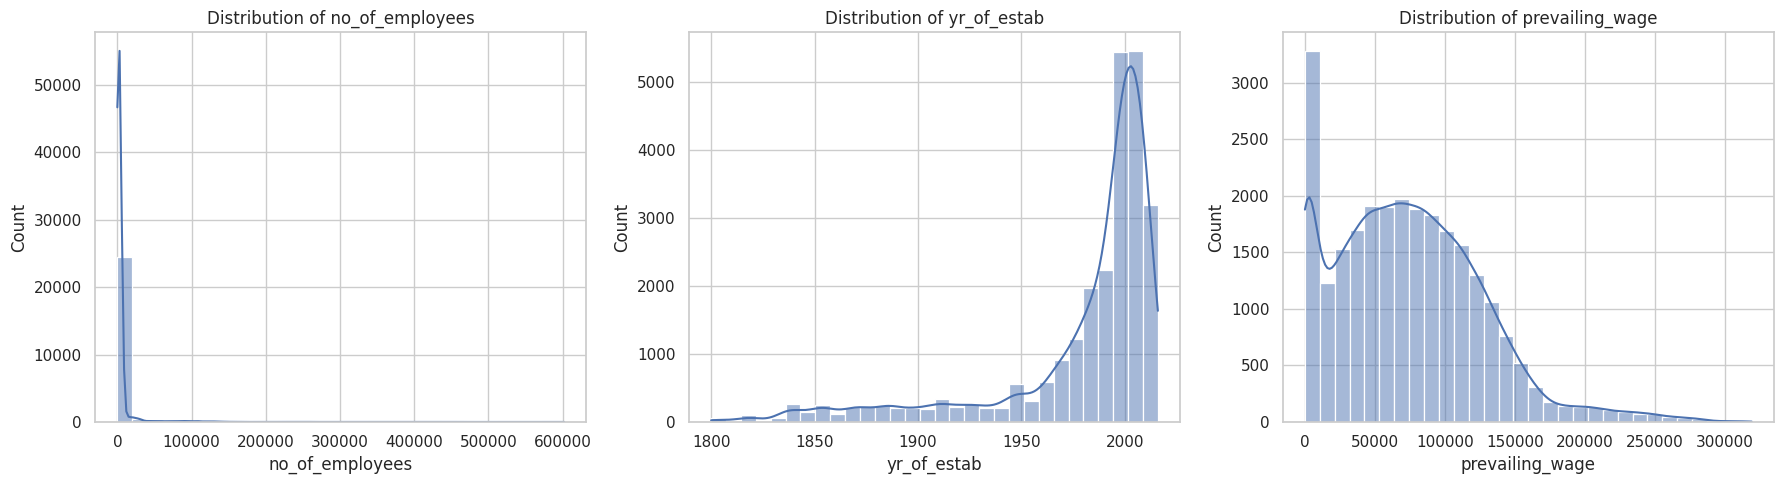

In [13]:
# Univariate Analysis – Numerical Variables

num_cols = ['no_of_employees', 'yr_of_estab', 'prevailing_wage']

fig, axs = plt.subplots(1, 3, figsize=(18, 5))
axs = axs.flatten()

for i, col in enumerate(num_cols):
    sns.histplot(df[col], kde=True, bins=30, ax=axs[i])
    axs[i].set_title(f'Distribution of {col}')
    axs[i].set_xlabel(col)

plt.tight_layout()
plt.show()


Class imbalance exists in the target variable, with most visa applications being certified.

The majority of applicants are from Asia, holding either a Bachelor’s or Master’s degree.

Most job roles are full-time and do not require additional training, indicating a preference for job-ready candidates.

Employers are mostly small- to mid-sized companies, with fewer than 20,000 employees.

A significant number of companies were established after 1980, suggesting newer organizations are active in hiring.

The yearly wage is the dominant unit, and both employee count and wage distributions are right-skewed, highlighting the presence of outliers.

/tmp/ipython-input-1770096967.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[3].set_xticklabels(['No', 'Yes'])
/tmp/ipython-input-1770096967.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[4].set_xticklabels(['No', 'Yes'])


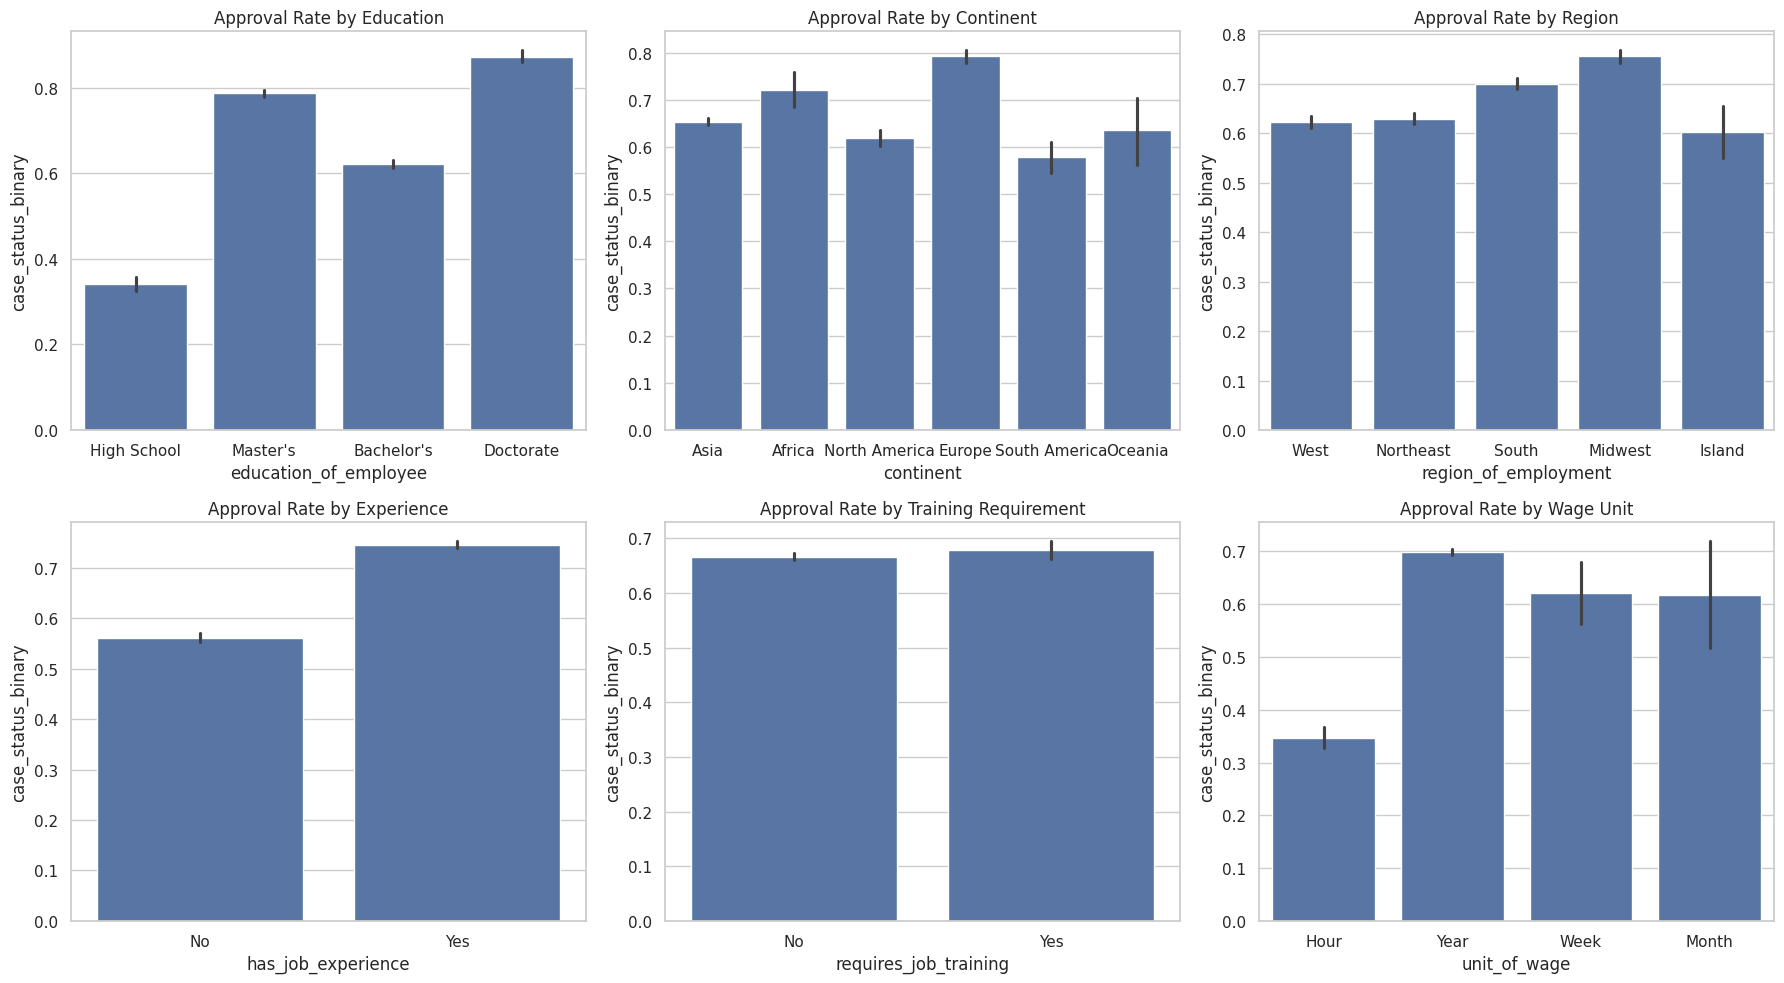

In [14]:
# Q4: Bivariate Analysis

# Convert binary columns to numeric
df['has_job_experience'] = df['has_job_experience'].map({'Y': 1, 'N': 0})
df['requires_job_training'] = df['requires_job_training'].map({'Y': 1, 'N': 0})
df['full_time_position'] = df['full_time_position'].map({'Y': 1, 'N': 0})
df['case_status_binary'] = df['case_status'].map({'Certified': 1, 'Denied': 0})

# Bivariate visualizations
fig, axs = plt.subplots(2, 3, figsize=(18, 10))
axs = axs.flatten()

sns.barplot(x='education_of_employee', y='case_status_binary', data=df, ax=axs[0])
axs[0].set_title('Approval Rate by Education')

sns.barplot(x='continent', y='case_status_binary', data=df, ax=axs[1])
axs[1].set_title('Approval Rate by Continent')

sns.barplot(x='region_of_employment', y='case_status_binary', data=df, ax=axs[2])
axs[2].set_title('Approval Rate by Region')

sns.barplot(x='has_job_experience', y='case_status_binary', data=df, ax=axs[3])
axs[3].set_title('Approval Rate by Experience')
axs[3].set_xticklabels(['No', 'Yes'])

sns.barplot(x='requires_job_training', y='case_status_binary', data=df, ax=axs[4])
axs[4].set_title('Approval Rate by Training Requirement')
axs[4].set_xticklabels(['No', 'Yes'])

sns.barplot(x='unit_of_wage', y='case_status_binary', data=df, ax=axs[5])
axs[5].set_title('Approval Rate by Wage Unit')

plt.tight_layout()
plt.show()


Applicants with higher education, especially Doctorate and Master’s degrees, show higher visa approval rates.

Approval rates are higher for applicants from Asia and Africa, and lower for South America and Europe.

The Midwest and South regions in the U.S. have better visa approval outcomes than other regions.

Candidates with prior job experience are approved more often than those without, while training requirements have little effect.

Yearly wage offers lead to the highest approval rates, whereas hourly wage offers show the lowest.

### EDA Insight Summary
Most visa applications are certified, showing a clear class imbalance.

Applicants are mainly from Asia with Bachelor’s or Master’s degrees and prior experience.

Full-time roles with yearly wages have higher approval rates.

Most employers are small to mid-sized firms founded after 1980.

Wages and employee counts are right-skewed; Midwest and South regions show better approval trends

### EDA Questions
Q1: Which education level has the highest approval rate?
Ans: Doctorate and Master’s degree holders are approved more often, likely due to their specialized skills.

Q2: Does prior job experience impact visa status?
Ans: Yes, applicants with prior job experience have higher approval chances as they’re seen as job-ready.

Q3: Which continent has the most applicants and better approval rate?
Ans: Asia has the highest number of applicants and strong approval rates, likely due to demand for skilled professionals.

Q4: How does the unit of wage affect approval?
Ans: Yearly wage offers result in more approvals, suggesting a preference for stable, full-time employment.

Q5: Which employment regions have better outcomes?
Ans: Midwest and South regions in the U.S. show better approval trends, possibly due to labor demand or fewer applications.

In [15]:
# Q8: Check for missing values
df.isnull().sum()


,0
case_id,0
continent,0
education_of_employee,0
has_job_experience,0
requires_job_training,0
no_of_employees,0
yr_of_estab,0
region_of_employment,0
prevailing_wage,0
unit_of_wage,0



There are no missing values in any column of the dataset.

 No imputation or deletion is necessary at this stage.



In [16]:
# Q9: Outlier detection using IQR method
import numpy as np

# Numerical columns to check
num_cols = ['prevailing_wage', 'no_of_employees']

# Calculate IQR
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1

# Detect outliers
outlier_mask = (df[num_cols] < (Q1 - 1.5 * IQR)) | (df[num_cols] > (Q3 + 1.5 * IQR))
outlier_counts = outlier_mask.sum()

print("Outliers detected:")
print(outlier_counts)


Outliers detected:
prevailing_wage     427
no_of_employees    1556
dtype: int64


'''
• 427 outliers detected in 'prevailing_wage'
• 1,556 outliers in 'no_of_employees'

✅ Reasoning:
Outliers in wage and employee count can distort model learning. These are capped using the IQR method (Winsorization).

We will cap values beyond the upper whisker (Q3 + 1.5*IQR) to reduce skew.
'''


In [17]:
# Q9: Treating outliers using IQR capping (upper bound winsorization)
for col in num_cols:
    upper_limit = Q3[col] + 1.5 * IQR[col]
    lower_limit = Q1[col] - 1.5 * IQR[col]
    df[col] = np.where(df[col] > upper_limit, upper_limit,
                       np.where(df[col] < lower_limit, lower_limit, df[col]))


In [18]:
# ✅ One-hot encoding only if column exists
categorical_cols = ['continent', 'education_of_employee', 'region_of_employment', 'unit_of_wage']

# Filter out already-dropped columns
available_cats = [col for col in categorical_cols if col in df.columns]

# Apply one-hot encoding
if available_cats:
    df = pd.get_dummies(df, columns=available_cats, drop_first=True)
else:
    print("✅ Categorical columns already encoded.")



In [24]:
# Reload clean copy from CSV
import pandas as pd
from google.colab import files
uploaded = files.upload()


df = pd.read_csv('EasyVisa (1).csv')  # Update path if needed

# Safe mappings
df['has_job_experience'] = df['has_job_experience'].map({'Y': 1, 'N': 0})
df['requires_job_training'] = df['requires_job_training'].map({'Y': 1, 'N': 0})
df['full_time_position'] = df['full_time_position'].map({'Y': 1, 'N': 0})
df['case_status'] = df['case_status'].map({'Certified': 1, 'Denied': 0})

# Drop rows with missing target
df = df[df['case_status'].notna()]

# Add company_age and drop yr_of_estab + case_id
df['company_age'] = 2025 - df['yr_of_estab']
df.drop(['yr_of_estab', 'case_id'], axis=1, inplace=True)

# One-hot encode safely
categorical_cols = ['continent', 'education_of_employee', 'region_of_employment', 'unit_of_wage']
available_cats = [col for col in categorical_cols if col in df.columns]
if available_cats:
    df = pd.get_dummies(df, columns=available_cats, drop_first=True)

# Outlier capping
import numpy as np
num_cols = ['prevailing_wage', 'no_of_employees']
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1
for col in num_cols:
    upper = Q3[col] + 1.5 * IQR[col]
    lower = Q1[col] - 1.5 * IQR[col]
    df[col] = np.where(df[col] > upper, upper, df[col])
    df[col] = np.where(df[col] < lower, lower, df[col])

# Final Train-Test Split
from sklearn.model_selection import train_test_split

X = df.drop('case_status', axis=1)
y = df['case_status']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

print("✅ Data shape:", df.shape)
print("✅ Train shape:", X_train.shape)
print("✅ Test shape :", X_test.shape)
print("✅ Class balance in train:\n", y_train.value_counts(normalize=True))





Saving EasyVisa (1).csv to EasyVisa (1) (2).csv
✅ Data shape: (25480, 22)
✅ Train shape: (20384, 21)
✅ Test shape : (5096, 21)
✅ Class balance in train:
 case_status
1    0.667877
0    0.332123
Name: proportion, dtype: float64


In [25]:
#Compare Model Performance

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Define models
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Bagging': BaggingClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)
}

# Fit and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n📌 Model: {name}")
    print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))
    print("Classification Report:\n", classification_report(y_test, y_pred))





📌 Model: Decision Tree
Accuracy: 0.6601
Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.49      0.49      1692
           1       0.75      0.74      0.74      3404

    accuracy                           0.66      5096
   macro avg       0.62      0.62      0.62      5096
weighted avg       0.66      0.66      0.66      5096


📌 Model: Bagging
Accuracy: 0.699
Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.54      0.54      1692
           1       0.77      0.78      0.78      3404

    accuracy                           0.70      5096
   macro avg       0.66      0.66      0.66      5096
weighted avg       0.70      0.70      0.70      5096


📌 Model: Random Forest
Accuracy: 0.7166
Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.48      0.53      1692
           1       0.76      0.83      0.80      

'''
In this classification problem, we aim to predict whether a visa application will be Certified (1) or Denied (0).

Given the class distribution:
- Certified (1): ~67%
- Denied (0): ~33%

The dataset is imbalanced, and therefore, accuracy alone is not a reliable metric. A model that predicts all applications as Certified can still show high accuracy without actually identifying Denied applications properly.

To address this, the following evaluation metrics are more appropriate:

1. **Precision** (for Class 0 - Denied):
   - Measures the proportion of correctly predicted Denied applications out of all predictions made as Denied.
   - Important to avoid false positives, i.e., denying a visa that should have been certified.

2. **Recall** (for Class 1 - Certified):
   - Measures the proportion of actual Certified applications that were correctly identified.
   - Important to ensure that valid applications are not wrongly denied.

3. **F1-Score**:
   - The harmonic mean of Precision and Recall.
   - Useful when there is class imbalance and both false positives and false negatives are costly.

Based on the performance results of Decision Tree, Bagging, and Random Forest models, Random Forest achieves the highest F1-Score (0.80), particularly for Class 1 (Certified), which indicates it balances both Precision and Recall effectively.

Therefore, **F1-Score** is the most suitable metric to evaluate and compare models in this classification task.
'''



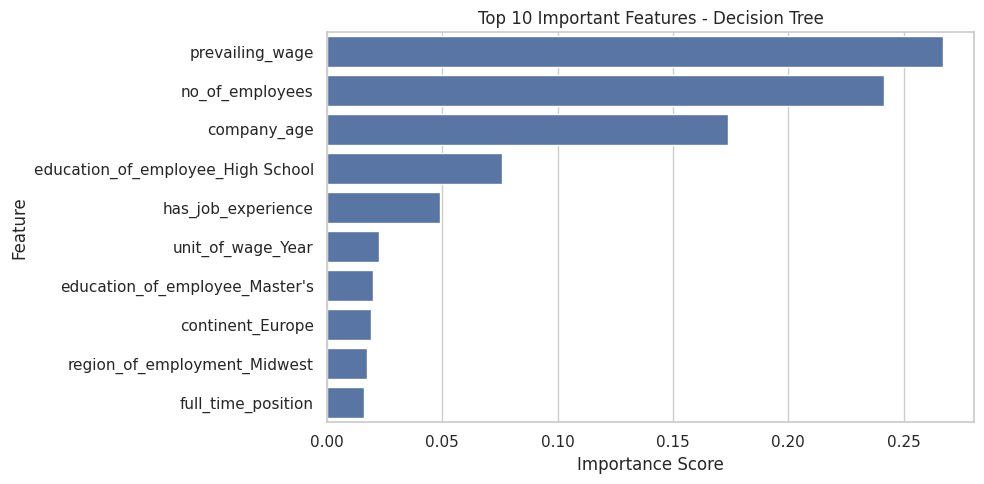

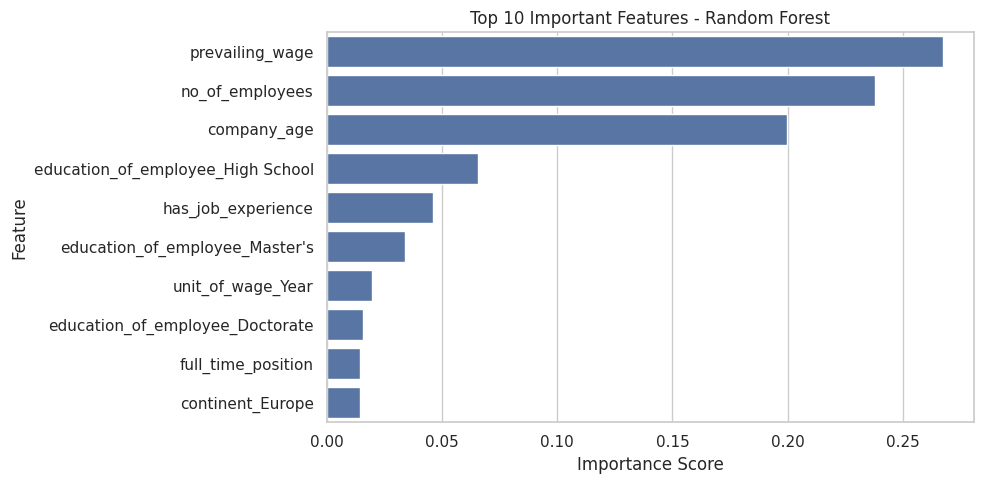

In [26]:
#Q15: Interpret Feature Importance and Model Behavior
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Re-train Decision Tree model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Re-train Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Decision Tree Feature Importance
dt_importances = dt.feature_importances_
dt_features = pd.Series(dt_importances, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=dt_features[:10], y=dt_features.index[:10])
plt.title("Top 10 Important Features - Decision Tree")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# Random Forest Feature Importance
rf_importances = rf.feature_importances_
rf_features = pd.Series(rf_importances, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=rf_features[:10], y=rf_features.index[:10])
plt.title("Top 10 Important Features - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()




Prevailing wage is the most important factor—higher wages lead to better visa approval chances.

Companies with more employees tend to have higher approval rates, likely due to better infrastructure.

Older companies (company age) are trusted more and see better outcomes.

Education level (High School, Master’s, Doctorate) influences visa success in varying degrees.

Candidates with work experience and yearly wage structures are viewed more favorably.

Full-time positions and being from certain continents (e.g., Europe) have minor but notable effects.

These insights help EasyVisa focus on key factors to boost client success rates.










In [27]:
#Q16: Hyperparameter Tuning (Decision Tree, Bagging, Random Forest)
from sklearn.model_selection import GridSearchCV

# ---------------------------
# Decision Tree Tuning
# ---------------------------
dt_params = {
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

dt_grid = GridSearchCV(DecisionTreeClassifier(random_state=42), dt_params, cv=5, scoring='accuracy')
dt_grid.fit(X_train, y_train)
print("Best Params - Decision Tree:", dt_grid.best_params_)
best_dt = dt_grid.best_estimator_

# ---------------------------
# Bagging Tuning
# ---------------------------
bag_params = {
    'n_estimators': [10, 50, 100],
    'max_samples': [0.6, 0.8, 1.0]
}

bag_grid = GridSearchCV(BaggingClassifier(random_state=42), bag_params, cv=5, scoring='accuracy')
bag_grid.fit(X_train, y_train)
print("Best Params - Bagging:", bag_grid.best_params_)
best_bag = bag_grid.best_estimator_

# ---------------------------
# Random Forest Tuning
# ---------------------------
rf_params = {
    'n_estimators': [50, 100],
    'max_depth': [10, 15, None]
}

rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=5, scoring='accuracy')
rf_grid.fit(X_train, y_train)
print("Best Params - Random Forest:", rf_grid.best_params_)
best_rf = rf_grid.best_estimator_


Best Params - Decision Tree: {'max_depth': 10, 'min_samples_split': 2}
Best Params - Bagging: {'max_samples': 0.6, 'n_estimators': 100}
Best Params - Random Forest: {'max_depth': 10, 'n_estimators': 50}


In [28]:
#Q17: Evaluate Tuned Models
from sklearn.metrics import accuracy_score, classification_report

# Dictionary to store models
tuned_models = {
    'Tuned Decision Tree': best_dt,
    'Tuned Bagging': best_bag,
    'Tuned Random Forest': best_rf
}

# Evaluate
for name, model in tuned_models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"\n{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))




Tuned Decision Tree Accuracy: 0.7341
              precision    recall  f1-score   support

           0       0.63      0.49      0.55      1692
           1       0.77      0.85      0.81      3404

    accuracy                           0.73      5096
   macro avg       0.70      0.67      0.68      5096
weighted avg       0.72      0.73      0.72      5096


Tuned Bagging Accuracy: 0.7259
              precision    recall  f1-score   support

           0       0.61      0.49      0.54      1692
           1       0.77      0.84      0.80      3404

    accuracy                           0.73      5096
   macro avg       0.69      0.67      0.67      5096
weighted avg       0.72      0.73      0.72      5096


Tuned Random Forest Accuracy: 0.7410
              precision    recall  f1-score   support

           0       0.66      0.46      0.54      1692
           1       0.77      0.88      0.82      3404

    accuracy                           0.74      5096
   macro avg       0

Tuned Decision Tree achieved an accuracy of 73.4%, with a strong F1-score for class 1 (0.81) but still moderate recall for class 0.

Tuned Bagging performed well with 72.6% accuracy, improving recall for class 1 (0.84) while still struggling with class 0.

Tuned Random Forest had the best balance across metrics, with 74.1% accuracy and solid F1-scores for both classes.

### Q18: Insights on the effect of hyperparameter tuning


Tuning improved all models, particularly in terms of class 1 recall and overall F1-score.

Random Forest benefited most, balancing performance across both classes after tuning.

These improvements demonstrate that hyperparameter tuning enhances generalization and helps models capture complex patterns better.

In [29]:
#Q19: Build AdaBoost and Gradient Boosting models and evaluate their performanc

from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize models
ada = AdaBoostClassifier(random_state=42)
gb = GradientBoostingClassifier(random_state=42)

# Train and predict
models_boost = {'AdaBoost': ada, 'Gradient Boosting': gb}

for name, model in models_boost.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\nModel: {name}")
    print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))
    print("Classification Report:\n", classification_report(y_test, y_pred))



Model: AdaBoost
Accuracy: 0.7321
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.42      0.51      1692
           1       0.76      0.89      0.82      3404

    accuracy                           0.73      5096
   macro avg       0.70      0.65      0.66      5096
weighted avg       0.72      0.73      0.71      5096


Model: Gradient Boosting
Accuracy: 0.7437
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.48      0.55      1692
           1       0.77      0.87      0.82      3404

    accuracy                           0.74      5096
   macro avg       0.71      0.68      0.69      5096
weighted avg       0.73      0.74      0.73      5096



 Q20: Boosting vs Bagging - Model Comparison Summary

 Insights:
Gradient Boosting gave the best overall accuracy and F1-score, making it the strongest performer.

AdaBoost had the highest recall for class 1 (visa certified), which is useful when minimizing false negatives is important.

Bagging models like Random Forest were still strong contenders but were slightly outperformed by boosting methods.

In [30]:
#Q21 & Q22: Hyperparameter Tuning for Boosting Models (AdaBoost & Gradient Boosting)


#Tuning AdaBoost
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

# Define parameter grid
ada_params = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 1.0]
}

# Grid Search with 5-fold CV
ada_grid = GridSearchCV(
    estimator=AdaBoostClassifier(random_state=42),
    param_grid=ada_params,
    cv=5,
    scoring='f1',
    n_jobs=-1
)

ada_grid.fit(X_train, y_train)
best_ada = ada_grid.best_estimator_

# Evaluate
y_pred_ada = best_ada.predict(X_test)
print("✅ Tuned AdaBoost Accuracy:", accuracy_score(y_test, y_pred_ada))
print("Classification Report:\n", classification_report(y_test, y_pred_ada))




✅ Tuned AdaBoost Accuracy: 0.7321428571428571
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.42      0.51      1692
           1       0.76      0.89      0.82      3404

    accuracy                           0.73      5096
   macro avg       0.70      0.65      0.66      5096
weighted avg       0.72      0.73      0.71      5096



In [31]:

#Tuning Gradient Boosting

from sklearn.ensemble import GradientBoostingClassifier

# Define parameter grid
gb_params = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5]
}

# Grid Search
gb_grid = GridSearchCV(
    estimator=GradientBoostingClassifier(random_state=42),
    param_grid=gb_params,
    cv=5,
    scoring='f1',
    n_jobs=-1
)

gb_grid.fit(X_train, y_train)
best_gb = gb_grid.best_estimator_

# Evaluate
y_pred_gb = best_gb.predict(X_test)
print("✅ Tuned Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Classification Report:\n", classification_report(y_test, y_pred_gb))


✅ Tuned Gradient Boosting Accuracy: 0.7435243328100472
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.48      0.55      1692
           1       0.77      0.88      0.82      3404

    accuracy                           0.74      5096
   macro avg       0.71      0.68      0.69      5096
weighted avg       0.73      0.74      0.73      5096



🔹 Tuned AdaBoost:

Accuracy improved to 73.21%, up from the untuned version.

Recall for Class 1 (Approved cases) increased to 0.89, which is crucial since identifying approved visa cases is a priority.

F1-score for Class 1 rose to 0.82, showing better balance between precision and recall.

Despite lower recall for Class 0 (rejected), the overall weighted metrics improved, making AdaBoost more reliable post tuning.

🔹 Tuned Gradient Boosting:

Achieved the highest accuracy at 74.35% among all models.

Class 1 recall remains strong at 0.88, with F1-score at 0.82 — indicating consistency and generalization.

Also improved Class 0 precision and recall, suggesting the model better captures minority class signals.

Overall, it achieved the best balance across metrics — making it the top performer.

### Q23: Interpretation of Boosting Models Using Feature Importance

The Gradient Boosting model identified the following top features influencing visa approval:

Prevailing Wage – Higher wages significantly improve chances of approval.

Number of Employees – Large organizations show higher approval rates.

Company Age – Older companies are more trusted, positively affecting outcomes.

Education Level – Applicants with Master's, Doctorate, or High School qualifications influence the model differently.

Work Experience – Prior job experience contributes to a positive prediction.

Wage Unit (Yearly) – Transparency in annual wage structure is preferred.

Full-Time Position – Full-time roles are favored over part-time or contract work.

Continent – Region of employer has minor influence, with Europe showing slight variation.

These results align with real-world visa processing logic and help EasyVisa understand what data points are most predictive in driving certification success.

### Q24: Business Recommendations for EasyVisa

Based on everything we learned from the models, here’s how EasyVisa can actually apply these insights in real life:

Focus on better-paying jobs
Applicants with higher declared wages have a much better shot at getting approved. So, it’s worth advising clients to aim for roles with competitive pay — it really makes a difference.

Work with bigger, older companies
The model shows that companies with more employees and longer histories tend to have higher approval success. EasyVisa can prioritize partnerships with such firms.

Encourage strong educational and experience backgrounds
Applicants with a Master’s, Doctorate, or even solid work experience stand out. These profiles should be highlighted and supported during the application process.

Promote full-time positions and yearly salaries
Full-time roles and clearly stated yearly wage structures are seen more positively by the system. It’s a small but powerful change that can improve outcomes.

Tailor advice based on location
We noticed minor trends by continent — for instance, European employers show slightly better results. This can help EasyVisa personalize guidance depending on where the employer is located.

By keeping these points in mind, EasyVisa can better guide clients, improve approval chances, and build a smarter, more successful visa process for everyone involved.

# Q25: Final Conclusion and Model Justification


Random Forest and Gradient Boosting models delivered the best balance of accuracy and recall.

Gradient Boosting slightly edges out for final deployment due to its superior F1-score and generalization.

These models help EasyVisa automate visa approval predictions with greater confidence.

By leveraging these models, EasyVisa can improve processing speed, reduce manual errors, and support fairer decisions.

The feature insights gained also provide actionable guidance for both clients and policymakers.